In [1]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import os
import tqdm
import imutils
%matplotlib inline

In [42]:
labels = []
gta = list(sorted(os.listdir(os.path.join('data/train', "gt"))))
for idx in tqdm.tqdm(range(len(gta))):
    gt_path = os.path.join('data/train', "gt", gta[idx])
    gt = open(gt_path,'r',encoding='utf8').readlines()
    gt = list(map(lambda x :x.strip().split(','),gt))

    for i in range(len(gt)):
        if gt[i][8] not in labels:
            labels.append(gt[i][8])

100%|██████████| 7932/7932 [00:00<00:00, 14024.50it/s]


In [43]:
labels

['Latin',
 'Arabic',
 'Symbols',
 'None',
 'Chinese',
 'Mixed',
 'Japanese',
 'Korean',
 'Bangla',
 'Hindi']

In [2]:
def scale(point,ori_width,ori_height,to_width,to_height):
    return(int(int(point[0])*to_width/ori_width),int(int(point[1])*to_height/ori_height))
img = Image.open('data/train/img/tr_img_00001.jpg', 'r')
imgArray = np.array(img)
ori_width = imgArray.shape[1]
ori_height = imgArray.shape[0]
r = min(1024/ori_width,1024/ori_height)
to_width = int(ori_width*r)
to_height = int(ori_height*r)
img = img.resize((to_width,to_height),Image.ANTIALIAS)
gt = open('data/train/gt/tr_img_00001.txt','r',encoding='utf8').readlines()
gt  = list(map(lambda x :x.strip().split(','),gt))

In [3]:
point1 = scale(list(map(lambda x:int(x),gt[3][0:2])),ori_width,ori_height,to_width,to_height)
point2 = scale(list(map(lambda x:int(x),gt[3][2:4])),ori_width,ori_height,to_width,to_height)
point3 = scale(list(map(lambda x:int(x),gt[3][4:6])),ori_width,ori_height,to_width,to_height)
point4 = scale(list(map(lambda x:int(x),gt[3][6:8])),ori_width,ori_height,to_width,to_height)


In [7]:
img = Image.open('data/train/img/tr_img_00001.jpg', 'r')


(1152, 2048, 3)

In [14]:
# im = Image.open('data/train/img/tr_img_00001.jpg', 'r')
# im = np.array(im)
im = cv2.imread('data/train/img/tr_img_00001.jpg')
print((im)
gt = open('data/train/gt/tr_img_00001.txt','r',encoding='utf8').readlines()
gt  = list(map(lambda x :x.strip().split(','),gt))
for i in range(len(gt)):
    point1 = list(map(lambda x:int(x),gt[i][0:2]))
    point2 = list(map(lambda x:int(x),gt[i][2:4]))
    point3 = list(map(lambda x:int(x),gt[i][4:6]))
    point4 = list(map(lambda x:int(x),gt[i][6:8]))
    cnt = np.array([point1,point2,point3,point4])
    rect = cv2.minAreaRect(cnt)
    
    box = cv2.cv.Boxpoints() if imutils.is_cv2()else cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(im, [box], 0, (0, 0, 255), 2)
cv2.imwrite('./result.jpg',im)

<class 'numpy.ndarray'>


True

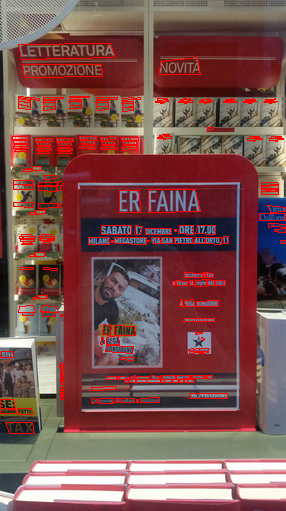

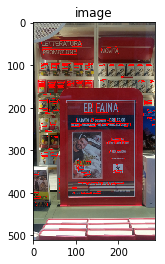

In [13]:
img = Image.open('data/train/img/tr_img_07634.jpg', 'r')
imgArray = np.array(img)
ori_width = imgArray.shape[1]
ori_height = imgArray.shape[0]
r = min(1024/ori_width,1024/ori_height)
to_width = int(ori_width*r)
to_height = int(ori_height*r)
img = img.resize((to_width,to_height),Image.ANTIALIAS)


gt = open('data/train/gt/tr_img_07634.txt','r',encoding='utf8').readlines()
gt  = list(map(lambda x :x.strip().split(','),gt))
def scale(point,ori_width,ori_height,to_width,to_height):
    return(int(int(point[0])*to_width/ori_width),int(int(point[1])*to_height/ori_height))
for i in range(len(gt)):
    point1 = scale(list(map(lambda x:int(x),gt[i][0:2])),ori_width,ori_height,to_width,to_height)
    point2 = scale(list(map(lambda x:int(x),gt[i][2:4])),ori_width,ori_height,to_width,to_height)
    point3 = scale(list(map(lambda x:int(x),gt[i][4:6])),ori_width,ori_height,to_width,to_height)
    point4 = scale(list(map(lambda x:int(x),gt[i][6:8])),ori_width,ori_height,to_width,to_height)
    xmin = min(point1[0],point2[0],point3[0],point4[0])
    xmax = max(point1[0],point2[0],point3[0],point4[0])
    ymin = min(point1[1],point2[1],point3[1],point4[1])
    ymax = max(point1[1],point2[1],point3[1],point4[1])

    draw = ImageDraw.Draw(img) #实例化一个对象
    draw.line(tuple(point1+point2), fill=255,width=1)
    draw.line(tuple(point2+point3), fill=255,width=1)
    draw.line(tuple(point3+point4), fill=255,width=1)
    draw.line(tuple(point4+point1), fill=255,width=1)
    # draw.line(tuple([xmin,ymin,xmax,ymax]), fill=0,  width=8)
    
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
img

In [3]:
img = Image.open('data/train/img/tr_img_07634.jpg', 'r')

img=img.resize((1200,2000),Image.ANTIALIAS)
imgArray = np.array(img)
imgArray.shape[0]

2000

In [4]:

plt.imshow(np.transpose(data[0][0], (1, 2, 0)))

NameError: name 'data' is not defined

In [29]:
import pickle as pkl
data = pkl.load(open('trainData1.pkl','rb'))

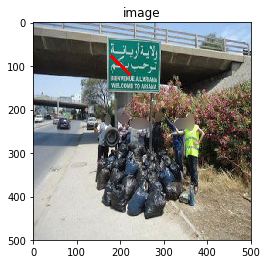

In [98]:
i = 7
img = data.data[i]
img = Image.fromarray(img)
draw = ImageDraw.Draw(img) #实例化一个对象
draw.line(tuple(data[i][1]['boxes'][3].tolist()), fill=1000,width=8)
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
plt.show()

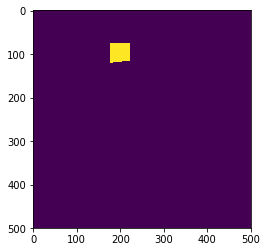

In [99]:
mask = data[i][1]['masks'][3].numpy()
mask[mask==1] = 255
plt.imshow(mask)

In [37]:
from utils.loadDataset import vison_dataset_loader,mycollate_fn
import torchvision.transforms as transforms
import torch
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = torch.load('baby_model')
model.eval()
batch_size = 1
num_workers = 16
trans = transforms.ToTensor()
dataset = vison_dataset_loader('data/train',0,500,transform=trans)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers,collate_fn=mycollate_fn)


100%|██████████| 500/500 [00:17<00:00, 29.31it/s]


In [22]:
testImg,testTarget = next(iter(data_loader))

In [39]:
output = model(testImg.cuda())

In [ ]:
img = np.uint8(255*np.transpose(testImg.cpu()[0].numpy(),(1, 2, 0)))
img = Image.fromarray(img)

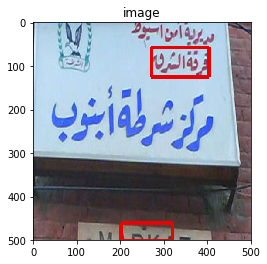

In [191]:
point = list(output[0]['boxes'][0].cpu().detach().numpy())
point1 = [int(point[0]),int(point[1])]#x1,y1
point2 = [int(point[0]),int(point[3])]#x1,y2
point3 = [int(point[2]),int(point[1])]#x2,y1
point4 = [int(point[2]),int(point[3])]#x1,y1
draw = ImageDraw.Draw(img) #实例化一个对象
draw.line(tuple(point1+point3), fill=1000,width=6)
draw.line(tuple(point1+point2), fill=1000,width=6)
draw.line(tuple(point2+point4), fill=1000,width=6)
draw.line(tuple(point3+point4), fill=1000,width=6)
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
plt.show()